## Given Image

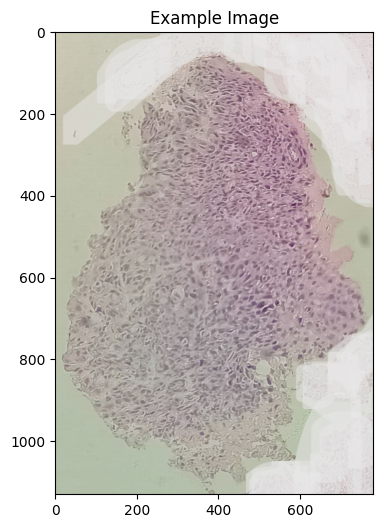

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = '/content/3_1.jpeg'

img = Image.open(image_path)

fig, ax = plt.subplots(figsize=(8, 6))

# Display the image
ax.imshow(img)
ax.set_title('Example Image')
ax.axis('on')

plt.show()


In [ ]:
!pip install scikit-image

In [ ]:
import cv2
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage
import numpy as np
import imutils
from google.colab.patches import cv2_imshow

image = cv2.imread("/content/tatti.png")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,
    cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
#cv2_imshow(thresh)
cv2.imwrite("/content/predicted_mask.png", thresh)



D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, indices=False, min_distance=20,
    labels=thresh)
#cv2_imshow(D)

markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

for label in np.unique(labels):
    # if the label is zero, we are examining the 'background'
    # so simply ignore it
    if label == 0:
        continue

    # otherwise, allocate memory for the label region and draw
    # it on the mask
    mask = np.zeros(gray.shape, dtype="uint8")
    mask[labels == label] = 255

    # detect contours in the mask and grab the largest one
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    # draw a circle enclosing the object
    ((x, y), r) = cv2.minEnclosingCircle(c)
    cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
    cv2.putText(image, "#{}".format(label), (int(x) - 10, int(y)),
        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)



#cv2_imshow(image)

cv2.waitKey(0)

<ipython-input-10-b4e51cf5d108>:20: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  localMax = peak_local_max(D, indices=False, min_distance=20,


[INFO] 190 unique segments found


-1

Number of cells: 1971


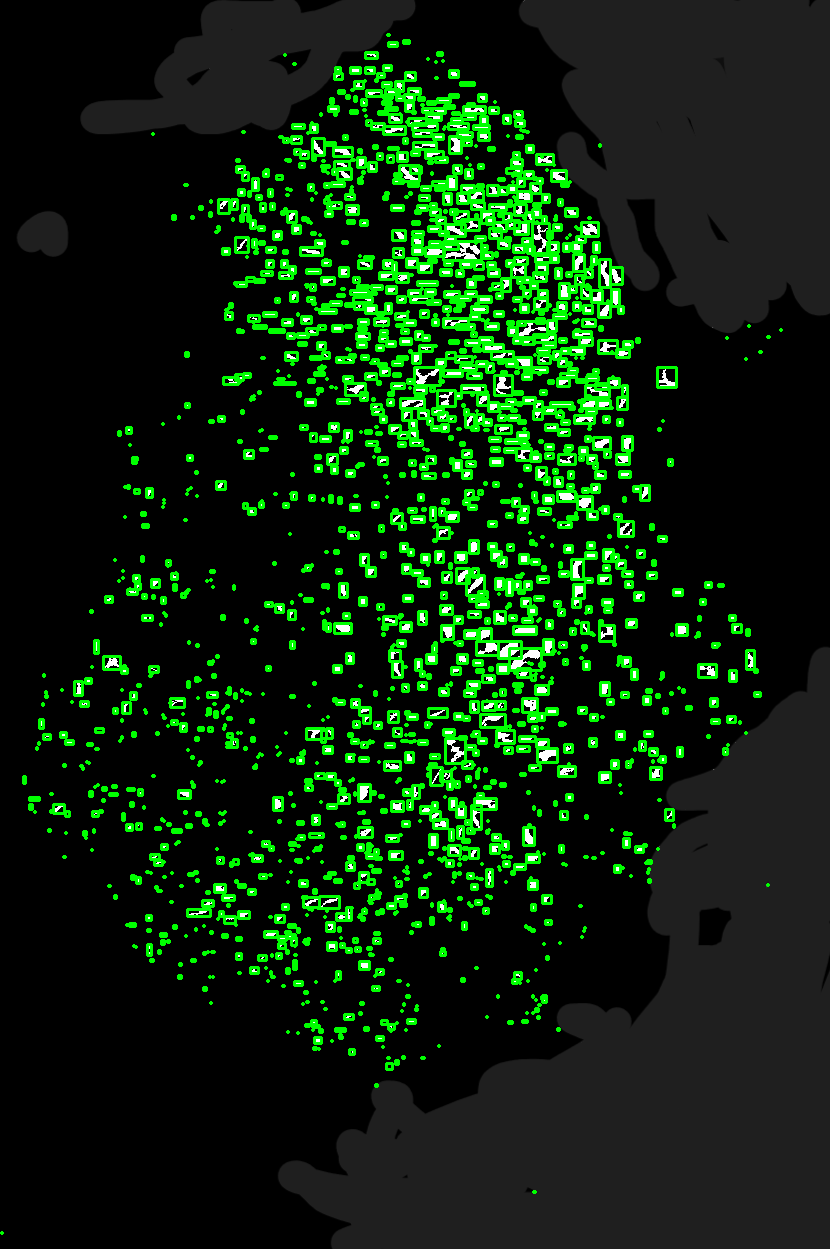

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/tatti.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to get a binary image
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the number of cells
print(f"Number of cells: {len(contours)}")

# Show the image with bounding boxes
cv2_imshow(image)
